In [1]:
import tensorflow as tf
print(tf.__version__)

2024-04-04 14:41:28.424624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 14:41:34.634623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.0


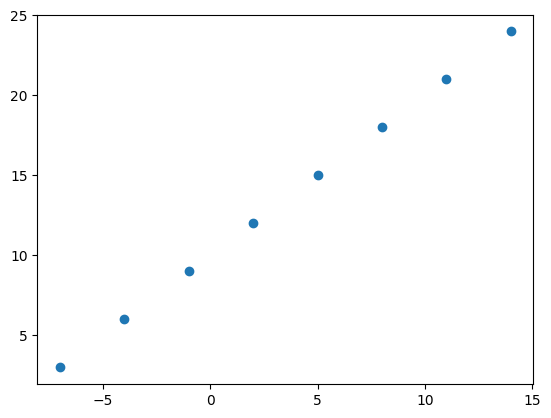

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x,y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2024-04-04 14:41:45.671242: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X = tf.constant(x)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=25)

Epoch 1/25
1/1 [==============================] - 0s 276ms/step - loss: 18.6253 - mae: 18.6253
Epoch 2/25
1/1 [==============================] - 0s 3ms/step - loss: 18.3441 - mae: 18.3441
Epoch 3/25
1/1 [==============================] - 0s 3ms/step - loss: 18.0628 - mae: 18.0628
Epoch 4/25
1/1 [==============================] - 0s 3ms/step - loss: 17.7816 - mae: 17.7816
Epoch 5/25
1/1 [==============================] - 0s 3ms/step - loss: 17.5003 - mae: 17.5003
Epoch 6/25
1/1 [==============================] - 0s 3ms/step - loss: 17.2191 - mae: 17.2191
Epoch 7/25
1/1 [==============================] - 0s 3ms/step - loss: 16.9378 - mae: 16.9378
Epoch 8/25
1/1 [==============================] - 0s 3ms/step - loss: 16.6566 - mae: 16.6566
Epoch 9/25
1/1 [==============================] - 0s 3ms/step - loss: 16.3753 - mae: 16.3753
Epoch 10/25
1/1 [==============================] - 0s 3ms/step - loss: 16.0941 - mae: 16.0941
Epoch 11/25
1/1 [==============================] - 0s 3ms/step - lo

In [9]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[0.2301968]], dtype=float32)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 192ms/step - loss: 20.7191 - mae: 20.7191
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 20.3722 - mae: 20.3722
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 20.0909 - mae: 20.0909
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 19.8097 - mae: 19.8097
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 19.5284 - mae: 19.5284
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 19.2472 - mae: 19.2472
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 18.9659 - mae: 18.9659
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 18.6847 - mae: 18.6847
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 18.4034 - mae: 18.4034
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 18.1222 - mae: 18.1222
Epoch 11/100
1/1 [==============================] - 0s 4m

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 46ms/step


array([[29.156553]], dtype=float32)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 358ms/step - loss: 13.5057 - mae: 13.5057
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4172 - mae: 13.4172
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.3288 - mae: 13.3288
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2404 - mae: 13.2404
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 13.1521 - mae: 13.1521
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.0639 - mae: 13.0639
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9765 - mae: 12.9765
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8895 - mae: 12.8895
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8027 - mae: 12.8027
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7161 - mae: 12.7161
Epoch 11/100
1/1 [==============================] - 0s 4m

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 46ms/step


array([[24.881746]], dtype=float32)

In [14]:
X = tf.range(-100,100,4)
y = X + 10

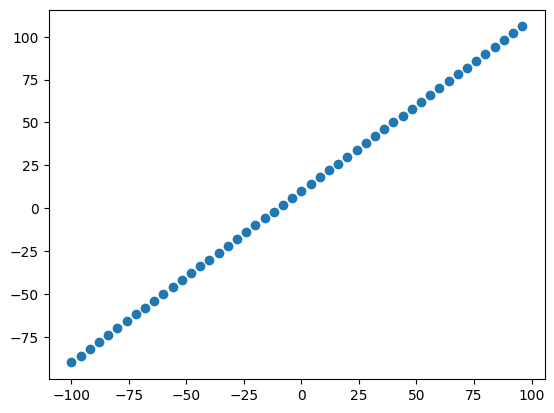

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [16]:
from sklearn.model_selection import train_test_split

X_numpy = X.numpy()
y_numpy = y.numpy()
X_train, X_test, y_train, y_test = train_test_split(X_numpy,y_numpy, test_size=0.2, random_state=42)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [17]:
len(X_train), len(X_test)

(40, 10)

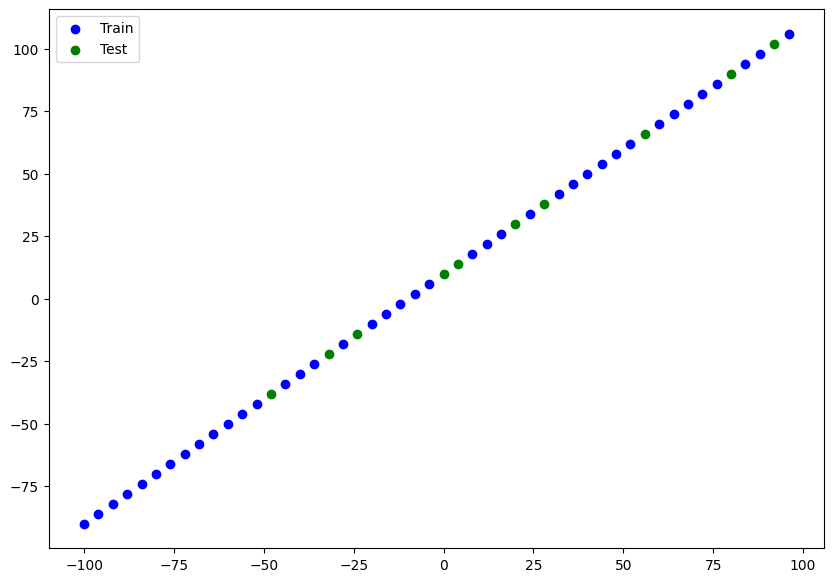

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b',label='Train')
plt.scatter(X_test, y_test, c='g',label='Test')
plt.legend();

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [20]:
#model.build()

In [21]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(59, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
], name='xd')
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.summary()

Model: "xd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 59)                118       
                                                                 
 output_layer (Dense)        (None, 1)                 60        
                                                                 
Total params: 178 (712.00 Byte)
Trainable params: 178 (712.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

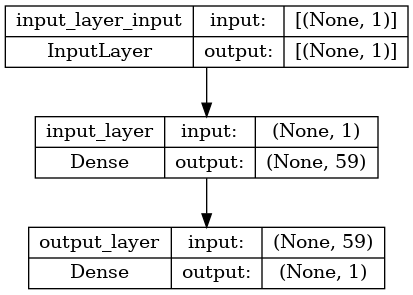

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [24]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[-83.457214 ],
       [100.91869  ],
       [ 37.096256 ],
       [143.46698  ],
       [-55.091694 ],
       [164.74112  ],
       [  8.730729 ],
       [  1.6393489],
       [ 51.279022 ],
       [-40.908936 ]], dtype=float32)

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14], dtype=int32)>

In [26]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

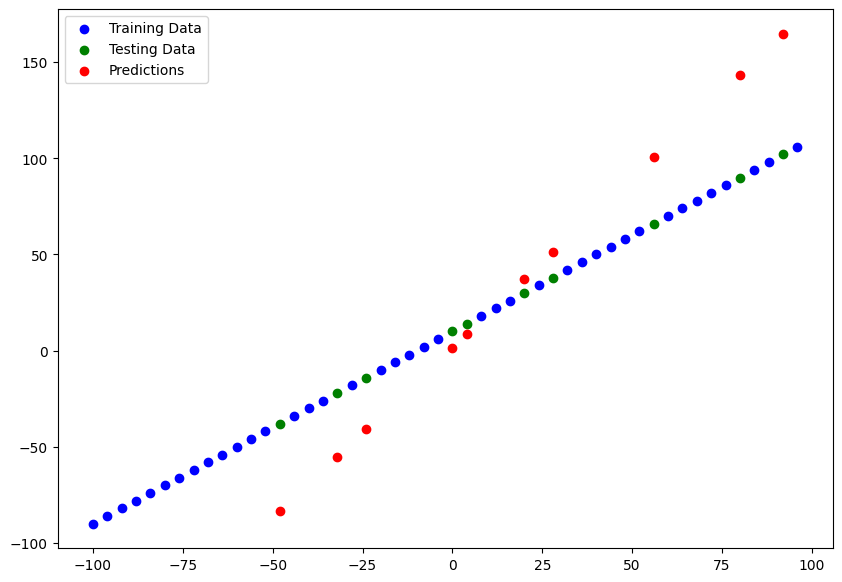

In [27]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [28]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 88ms/step - loss: 29.0590 - mae: 29.0590


[29.05898094177246, 29.05898094177246]

In [33]:
tf.constant(y_pred)


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-83.457214 ],
       [100.91869  ],
       [ 37.096256 ],
       [143.46698  ],
       [-55.091694 ],
       [164.74112  ],
       [  8.730729 ],
       [  1.6393489],
       [ 51.279022 ],
       [-40.908936 ]], dtype=float32)>

In [35]:
# Calc MAE

mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.058985>

In [37]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1222.4344>

In [38]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))  

In [46]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 32ms/step


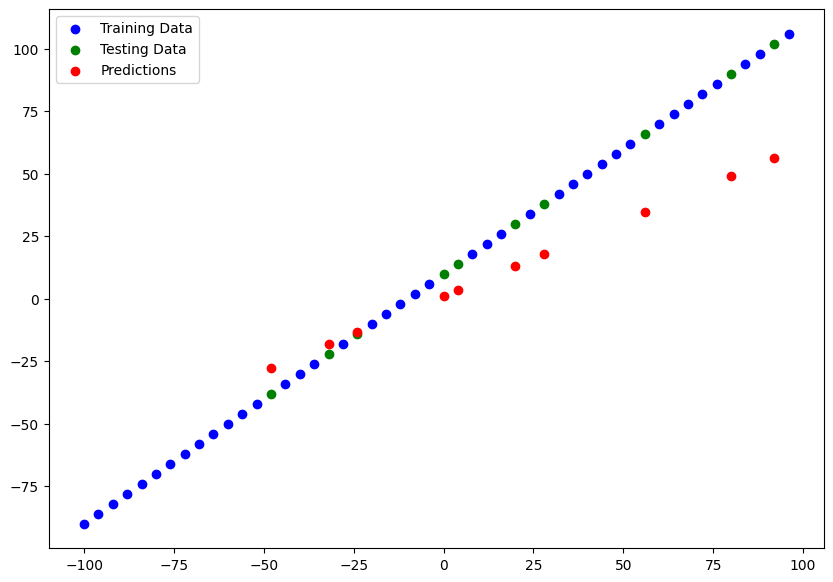

In [44]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [45]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.963026>,
 <tf.Tensor: shape=(), dtype=float32, numpy=575.81683>)

In [60]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 31ms/step


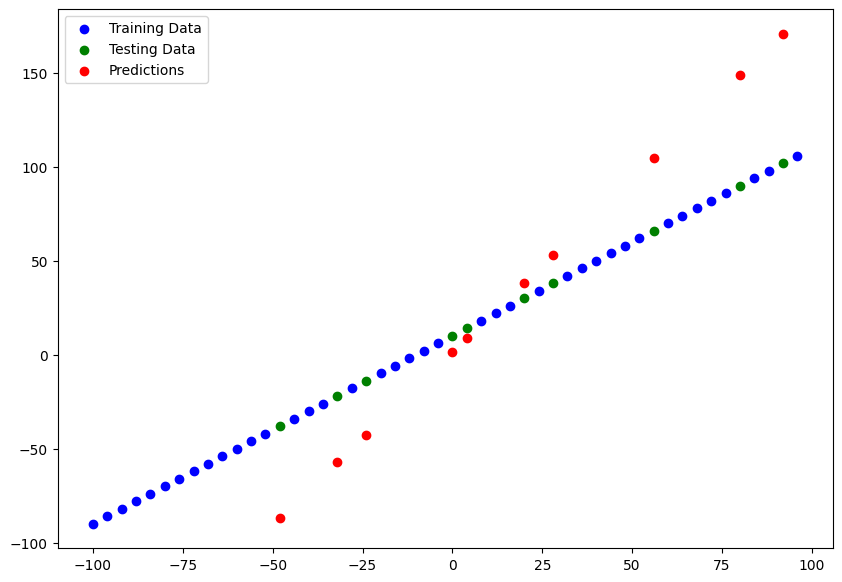

In [61]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [62]:
mse_2 = mse(y_test, y_pred_2)
mae_2 = mae(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=31.55125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1449.0632>)

In [68]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 31ms/step


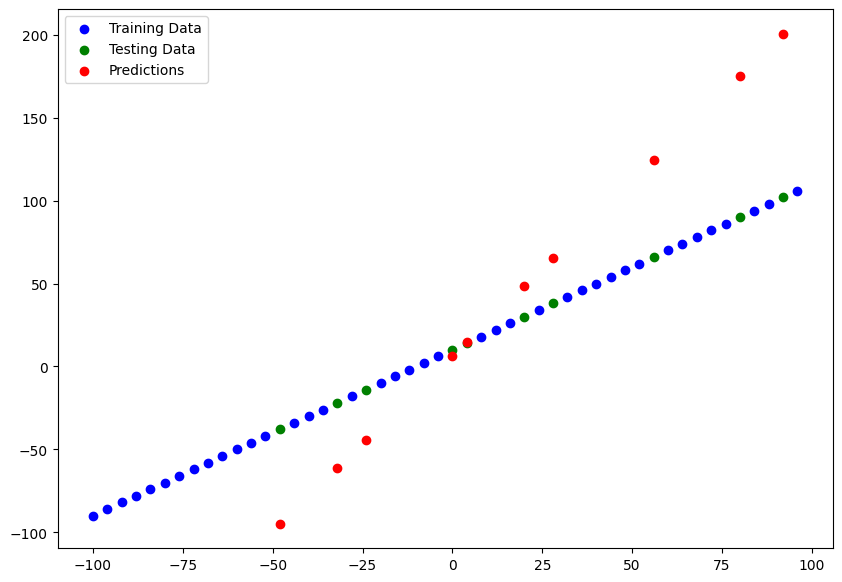

In [69]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [70]:
mse_3 = mse(y_test, y_pred_3)
mae_3 = mae(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=41.914852>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2720.5066>)

1/1 [==============================] - 0s 30ms/step


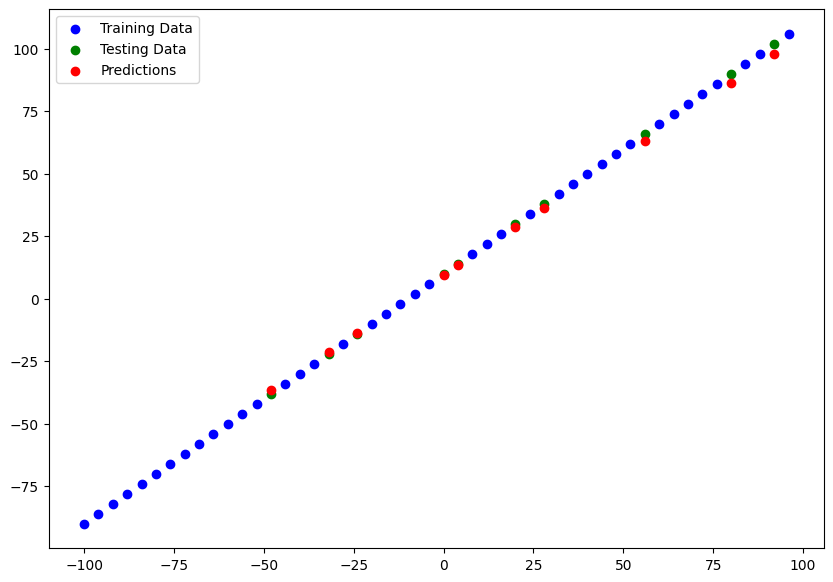

In [67]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5000, verbose=0)

y_pred_4 = model_4.predict(X_test)
plot_predictions(predictions=y_pred_4)

In [71]:
mse_4 = mse(y_test, y_pred_4)
mae_4 = mae(y_test, y_pred_4)

mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7303759>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.6261606>)

In [72]:
import pandas as pd
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()],
                 ['model_4', mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.963026,575.816833
1,model_2,31.551250,1449.063232
2,model_3,41.914852,2720.506592
3,model_4,1.730376,4.626161


In [73]:
model_4.save('best_model')

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


In [75]:
model_4.save('best_model_hdf5.keras')

In [78]:
loaded_Model = tf.keras.models.load_model('best_model')
loaded_Model.summary(), model_4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 2)                 4         
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 2)                 4         
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                

(None, None)

In [79]:
model_4_preds = model_4.predict(X_test)
loaded_preds = loaded_Model.predict(X_test)

model_4_preds == loaded_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [82]:
loaded_keras = tf.keras.models.load_model('best_model_hdf5.keras')

In [83]:
model_4_preds = model_4.predict(X_test)
loaded_keras_preds = loaded_keras.predict(X_test)

model_4_preds == loaded_keras_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [93]:
df = pd.read_csv('insurance.csv')
df = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'])
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [91]:
tf.convert_to_tensor(df)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).